In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from scipy.optimize import minimize_scalar

To get $20.0M net of attrition, you need approximately $29.8M gross new investment.


C:\Users\kellyja\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


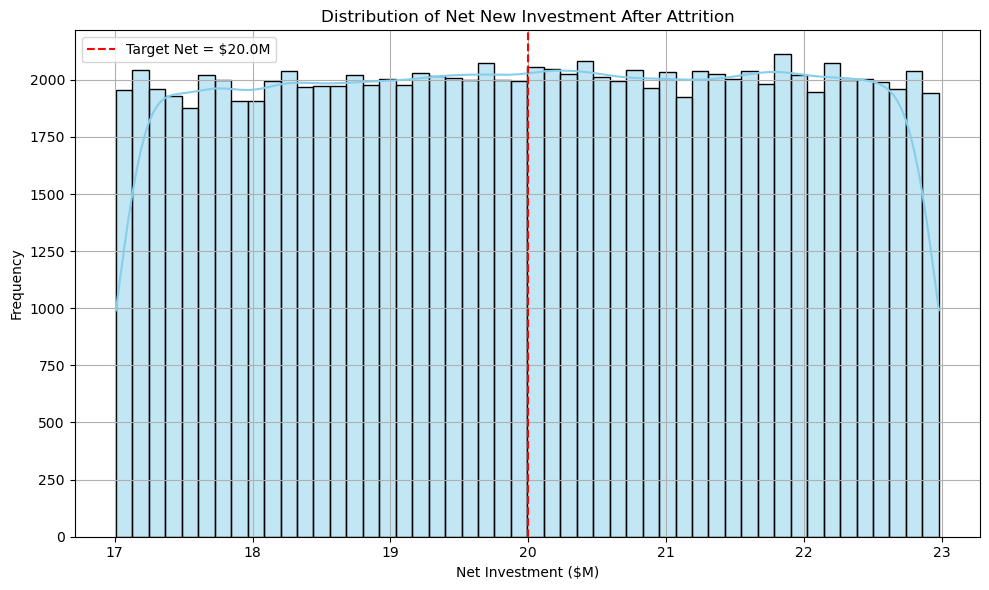

In [7]:
import numpy as np
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import seaborn as sns

# Desired net investment after attrition
target_net = 20.0  # in millions

# Attrition range (uniform distribution)
attrit_low = 0.23
attrit_high = 0.43
sims = 100000

# Function to simulate net outcome from a given gross input
def simulate_net(gross_new):
    attrition_rates = np.random.uniform(attrit_low, attrit_high, sims)
    net_new = gross_new * (1 - attrition_rates)
    return np.mean(net_new)

# Objective: how far is the simulated mean from the desired $20M net
def objective(gross_new):
    return (simulate_net(gross_new) - target_net) ** 2

# Use scalar optimization to find the gross investment needed
result = minimize_scalar(objective, bounds=(0, 100), method='bounded')
estimated_gross_new = result.x

# Final simulation for visualization
attrition_rates = np.random.uniform(attrit_low, attrit_high, sims)
net_new = estimated_gross_new * (1 - attrition_rates)

# Print result
print(f"To get ${target_net}M net of attrition, you need approximately ${estimated_gross_new:,.1f}M gross new investment.")

# ---- Visualization ----
plt.figure(figsize=(10, 6))
sns.histplot(net_new, bins=50, kde=True, color="skyblue")
plt.axvline(target_net, color='red', linestyle='--', label=f"Target Net = ${target_net}M")
plt.title("Distribution of Net New Investment After Attrition")
plt.xlabel("Net Investment ($M)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("net_investment_distribution.png", dpi=300)
plt.show()